a=0.07248 b=625.826 σ=4.899e-04
1.txt
r: 78.42%
ici
[[ 185.63889251    0.        ]
 [ 187.40641798 1625.84384686]
 [ 189.17354341 3066.45771878]
 ...
 [1769.33799146  -24.67245434]
 [1770.76522819  -61.82846749]
 [1772.19217465  -68.9376398 ]]


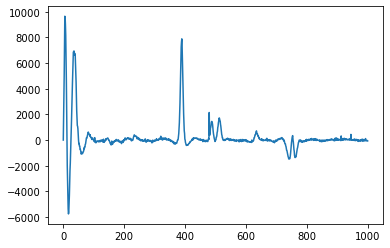

a=0.07248 b=625.826 σ=4.899e-04
1.txt
r: 87.09%
ici
[[ 1.85638893e+02  0.00000000e+00]
 [ 1.87406418e+02  1.35614414e+04]
 [ 1.89173543e+02  2.35525683e+04]
 ...
 [ 1.76933799e+03  2.44835768e+01]
 [ 1.77076523e+03 -7.04433182e+01]
 [ 1.77219217e+03  1.77288431e+01]]


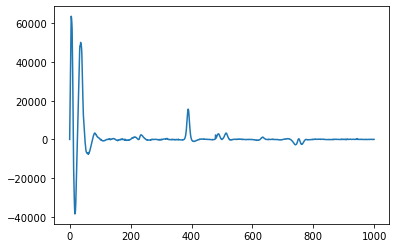

a=0.07248 b=625.826 σ=4.899e-04
1.txt
r: 103.60%
ici
[[1.85638893e+02 0.00000000e+00]
 [1.87406418e+02 3.49121825e+04]
 [1.89173543e+02 5.58905231e+04]
 ...
 [1.76933799e+03 5.62356138e+01]
 [1.77076523e+03 1.48001521e+01]
 [1.77219217e+03 2.70548847e+01]]


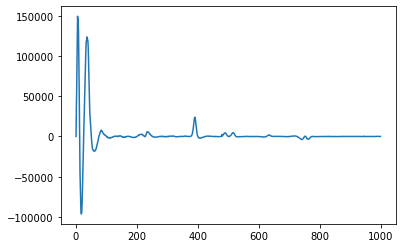

a=0.07248 b=625.826 σ=4.899e-04
1.txt
r: 44.59%
ici
[[ 185.63889251    0.        ]
 [ 187.40641798  620.33662593]
 [ 189.17354341 1152.26310242]
 ...
 [1769.33799146  -42.11909452]
 [1770.76522819  -57.2029206 ]
 [1772.19217465  -18.16319722]]


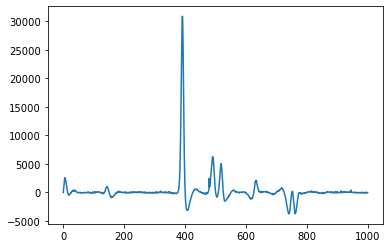

In [4]:
"Fichier qui implémente la classe d'objets raman_spectum qui sert à analyser les spectres raman"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy import stats, interpolate
from scipy.signal import find_peaks


class RamanSpectrum:
    def __init__(self, fich, promi):
        # self.data = np.genfromtxt(fich, delimiter='     ')
        self.data = np.genfromtxt(fich, delimiter=',')
        self.raman = self.data[:, 0]
        self.counts = self.data[:, 2]
        self.promi = int(promi)
        self.peaks = self.getPeaks()
        self.name = fich

    def graph(self, peaks=False):
        plt.plot(self.raman, self.counts, label=f'{self.name}')
        if peaks:
            for x in self.peaks:
                plt.plot(x[0], x[1], 'o', color='red')
                plt.text(x[0], x[1] + 0.5, '({}, {})'.format(x[0], x[1]))
        plt.legend()
        plt.xlabel('Raman shift [1/cm]')
        plt.ylabel('Counts')
        plt.title('Spectre complet éthanol à 25%')
    def graph_zero(self, peaks=False):
        liste = list(zip(self.raman, self.counts))
        raman = []
        counts = []
        for x in liste:
            if x[0] >= 0:
                raman.append(x[0])
                counts.append(x[1])
        plt.legend()
        plt.xlabel('Raman shift')
        plt.ylabel('Counts')
        plt.title('Spectre tronqué éthanol à 100%')
        plt.plot(raman, counts, label=f'{self.name}')
        if peaks:
            for x in self.peaks:
                plt.plot(x[0], x[1], 'o', color='red')
                plt.text(x[0], x[1] + 0.5, '({}, {})'.format(x[0], x[1]))
                plt.legend()
                plt.xlabel('Raman shift')
                plt.ylabel('Counts')


    def getPeaks(self):
        promi = self.promi
        ens_ini = list(zip(self.data[:, 0], self.data[:, 2]))
        raman = []
        counts = []
        for x in ens_ini:
            if x[0] >= 0:
                raman.append(x[0])
                counts.append(x[1])
        raman, counts = np.array(raman), np.array(counts)
        ens_fin = list(zip(raman, counts))
        points_maxi = []
        b = find_peaks(counts, prominence=promi)
        for x in b[0]:
            points_maxi.append(ens_fin[int(x)])
        return points_maxi

    def codeDan(self, *args):
        px = [625, 882, 1134, 1149]
        nm = [671, 690, 708, 709]
        # px = [611, 867, 1119, 1134]
        # nm = [671, 690, 708, 709]

        slope, intercept, r_value, p_value, std_err = stats.linregress(px, nm)
        print(f"a={slope:.5f}", f"b={intercept:.3f}",f"σ={std_err:.3e}")

        x_new = np.array(range(1339))
        nm = x_new*slope+intercept

        cm = 1/(632.8e-7) - 1/(nm*1e-7)
        i=0

        # Spectre
        for file in glob.glob(self.name):
            soln = file.split("_")[2]
            df = pd.read_csv(file)
            y = df.iloc[:, 2]
            y = y / max(abs(y))
            #plt.plot(nm, y, label=f"{soln}", linewidth=0.5)

        #plt.xlabel("$\lambda$ [nm]")
        #plt.ylabel("Intensité relative [-]")
        #plt.legend(loc="upper center", ncol=5, bbox_to_anchor=(0.5, 1.1))
        #plt.savefig("Spectre_huiles.png")
        #plt.show()
        #plt.clf()


        for file in glob.glob(self.name):
            soln = file.split("_")[2]
            print(soln)
            df = pd.read_csv(file)
            y = df.iloc[:, 2]
            # plt.plot(cm, y, label=f"{soln}", linewidth=0.5) # Spectre
            d = 25
            f2 = interpolate.interp1d(cm[200:][::d], y[200:][::d], kind='quadratic')
            y = y[200:1200]-f2(cm[200:1200])
            # y = y / max(y)
            mask_1444 = (cm[200:1200] > 1400) & (cm[200:1200] < 1500)
            mask_1661 = (cm[200:1200] > 1600) & (cm[200:1200] < 1700)
            I_1444 = max(y[mask_1444])
            I_1661 = max(y[mask_1661])
            if args == "plot":
                plt.plot(cm[200:1200], f2(cm[200:1200]), label=f"{soln}", linewidth=0.5) # Background
                plt.plot(cm[200:1200], y+2*i, label=f"{soln}", linewidth=0.5)
            print(f"r: {I_1444/I_1661*100:.2f}%")
            i += 1

        # self.data_Dan = np.array([cm[200:1200], y]).T
        self.data_Dan = np.array([cm[200:1200], y]).T
        print('ici')
        print(self.data_Dan)
        res = []
        for x in self.data_Dan:
            res.append(x[1])
        # return self.data_Dan
        return res

        #plt.xlabel("ν [1/cm]")
        #plt.ylabel("Intensité relative [-]")
        #plt.legend(loc="upper center", ncol=i, bbox_to_anchor=(0.5, 1.1))
        #plt.savefig("Raman_huiles.png")
        #plt.show()
        #plt.clf()

    def getDanPeaks(self):
        self.codeDan()
        promi = self.promi
        ens_ini = list(zip(self.data_Dan[:, 0], self.data_Dan[:, 1]))
        raman = []
        counts = []
        for x in ens_ini:
            if x[0] >= 0:
                raman.append(x[0])
                counts.append(x[1])
        raman, counts = np.array(raman), np.array(counts)
        ens_fin = list(zip(raman, counts))
        points_maxi = []
        b = find_peaks(counts, prominence=promi)
        for x in b[0]:
            points_maxi.append(ens_fin[int(x)])
        return points_maxi

eth25 = RamanSpectrum('Mesures bonnes\eth_251_1.txt', 1000)
eth50 = RamanSpectrum('Mesures bonnes\eth_501_1.txt', 1000) 
eth75 = RamanSpectrum('Mesures bonnes\eth_751_1.txt', 1000) 
eth100 = RamanSpectrum('Mesures bonnes\eth_1001_1.txt', 1000) 
# eth25.graph() 
# plt.show()
# eth25.graph_zero()
# eth50.graph_zero()
# eth75.graph_zero()
# eth100.graph_zero()
# plt.show()
plt.plot(eth25.codeDan())
plt.show()
plt.plot(eth50.codeDan())
plt.show()
plt.plot(eth75.codeDan())
plt.show()
plt.plot(eth100.codeDan())
plt.show()